# Bluesky diode scan
We are going to do this and that
xchong@lbl.gov, awojdyla@lbl.gov, dec 2023

In [176]:
import epics
import bluesky
import numpy as np
# we had issues with the kernel, bluesky error, noe we us the blop kernel

In [177]:
from bluesky import RunEngine
RE = RunEngine({})

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

0

In [178]:
pv_mono_angle_deg = 'bl531_xps1:mono_angle_deg'
pv_photodiode_mA  = 'bl201-beamstop:current'


pv_m101_pitch_mm  = 'bl531_esp300:m101_pitch_mm'
#pv_m101_bend_um   = 'bl531_esp300:m101_bend_um'
pv_mono_height_mm = 'bl531_xps1:mono_height_mm'

In [179]:
from ophyd import EpicsMotor
import ophyd
ophyd.set_cl('caproto')

#that does not work
diode_mA = ophyd.EpicsSignal('bl201-beamstop:current', name='photodiode') 
diode_mA.wait_for_connection(timeout=2.0)
diode_mA.read()

#
mono_angle_deg = EpicsMotor(pv_mono_angle_deg, name='Mono theta deg')
mono_angle_deg.wait_for_connection(timeout=2.0)
mono_angle_deg.read()

OrderedDict([('Mono theta deg',
              {'value': 26.0, 'timestamp': 1703016511.921417}),
             ('Mono theta deg_user_setpoint',
              {'value': 26.0, 'timestamp': 1703016646.708014})])

In [180]:
mono_height_mm = EpicsMotor(pv_mono_height_mm, name='Mono height mm')
mono_height_mm.wait_for_connection(timeout=2.0)
mono_height_mm.read()

OrderedDict([('Mono height mm',
              {'value': 40.9, 'timestamp': 1703016482.911396}),
             ('Mono height mm_user_setpoint',
              {'value': 40.9, 'timestamp': 1703016648.8683898})])

In [181]:
m101_pitch_mm = EpicsMotor(pv_m101_pitch_mm, name='M101 pitch mm')
m101_pitch_mm.wait_for_connection(timeout=2.0)
m101_pitch_mm.read()

OrderedDict([('M101 pitch mm',
              {'value': 0.24001999999999998, 'timestamp': 1703014784.480117}),
             ('M101 pitch mm_user_setpoint',
              {'value': 0.24, 'timestamp': 1703016650.587099})])

In [182]:
diode_mA.read()

{'photodiode': {'value': -74.43, 'timestamp': 1703016652.825827}}

In [185]:
mono_angle_deg.move(26)

MoveStatus(done=True, pos=Mono theta deg, elapsed=0.0, success=True, settle_time=0.0)

In [184]:
from bluesky.plans import count
#dets = [det1, det2]   # a list of any number of detectors

dets = [diode_mA]   # a list of any number of detectors
motors = mono_angle_deg

RE(count(dets))

('499524b5-42b9-4eb4-beb3-d7b61a919edc',)

In [96]:
# from bluesky.plans import count
# #dets = [det1, det2]   # a list of any number of detectors

# dets = [diode_mA]   # a list of any number of detectors
# #motors_h = mono_height_mm

# RE(count(dets))

('db7921ce-cc0c-4b80-8ed4-8c97add28bfb',)

In [193]:
mono_height_mm.move(41)

MoveStatus(done=True, pos=Mono height mm, elapsed=0.9, success=True, settle_time=0.0)

In [194]:
diode_mA.read()

{'photodiode': {'value': -67.09, 'timestamp': 1703017143.969778}}



Transient Scan ID: 13     Time: 2023-12-19 11:56:58
Persistent Unique Scan ID: '29fbd8d5-6b40-486c-b6a9-d463a5dd0fd3'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono height mm | photodiode |
+-----------+------------+----------------+------------+
|         1 | 11:56:58.6 |        40.0000 |         -4 |
|         2 | 11:56:59.4 |        40.1500 |         -4 |
|         3 | 11:57:00.3 |        40.3000 |         -5 |
|         4 | 11:57:01.2 |        40.4500 |        -19 |
|         5 | 11:57:02.0 |        40.6000 |        -40 |
|         6 | 11:57:02.9 |        40.7500 |        -40 |
|         7 | 11:57:03.8 |        40.9000 |        -64 |
|         8 | 11:57:04.7 |        41.0500 |        -75 |
|         9 | 11:57:05.5 |        41.2000 |        -76 |
|        10 | 11:57:06.4 |        41.3500 |        -76 |
|        11 | 11:57:07.3 |        41.5000 |        -48 |
|        12 | 11:57:08.2 |        41.6500 |         -5 |
|  

('29fbd8d5-6b40-486c-b6a9-d463a5dd0fd3',)

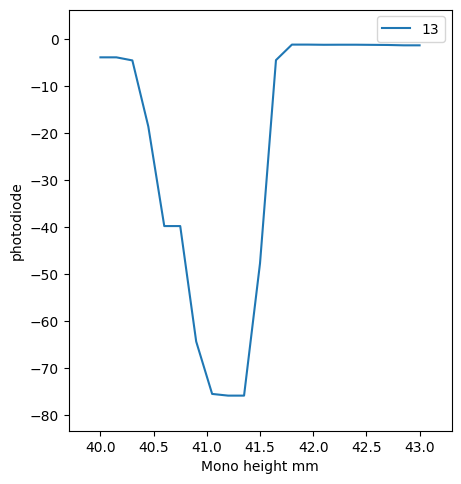

In [148]:
from bluesky.plans import scan
RE(scan(dets, mono_height_mm, 40, 43, 21))



Transient Scan ID: 7     Time: 2023-12-19 11:44:23
Persistent Unique Scan ID: '0beb1ba8-e57d-4e8d-b787-45bf5e1c166b'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono theta deg | photodiode |
+-----------+------------+----------------+------------+
|         1 | 11:44:23.9 |        25.0000 |         -1 |
|         2 | 11:44:24.1 |        25.0200 |         -1 |
|         3 | 11:44:24.4 |        25.0400 |         -1 |
|         4 | 11:44:24.6 |        25.0600 |         -1 |
|         5 | 11:44:24.8 |        25.0800 |         -1 |
|         6 | 11:44:25.0 |        25.1000 |         -1 |
|         7 | 11:44:25.2 |        25.1200 |         -1 |
|         8 | 11:44:25.4 |        25.1400 |         -1 |
|         9 | 11:44:25.7 |        25.1600 |         -1 |
|        10 | 11:44:25.9 |        25.1800 |         -1 |
|        11 | 11:44:26.1 |        25.2000 |         -1 |
|        12 | 11:44:26.3 |        25.2200 |         -1 |
|   

('0beb1ba8-e57d-4e8d-b787-45bf5e1c166b',)

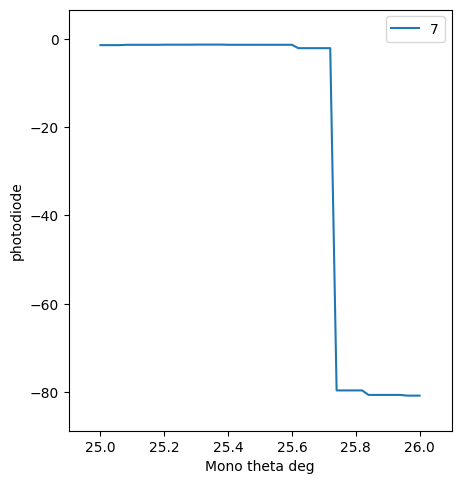

In [138]:
from bluesky.plans import scan
RE(scan(dets, mono_angle_deg, 25, 26, 51))



Transient Scan ID: 2     Time: 2023-12-19 12:11:20
Persistent Unique Scan ID: 'b519dad2-2959-414c-a69d-c2dc30d917b1'
New stream: 'primary'
+-----------+------------+---------------+----------------+------------+
|   seq_num |       time | M101 pitch mm | Mono height mm | photodiode |
+-----------+------------+---------------+----------------+------------+
|         1 | 12:11:26.0 |       0.00002 |        40.0000 |         -2 |
|         2 | 12:11:27.0 |       0.00002 |        40.2000 |         -2 |
|         3 | 12:11:28.0 |       0.00002 |        40.4000 |         -2 |
|         4 | 12:11:29.0 |       0.00002 |        40.6000 |         -2 |
|         5 | 12:11:30.0 |       0.00002 |        40.8000 |         -2 |
|         6 | 12:11:31.0 |       0.00002 |        41.0000 |         -2 |
|         7 | 12:11:31.9 |       0.00002 |        41.2000 |         -2 |
|         8 | 12:11:33.0 |       0.00002 |        41.4000 |         -2 |
|         9 | 12:11:34.0 |       0.00002 |        41.600

('b519dad2-2959-414c-a69d-c2dc30d917b1',)

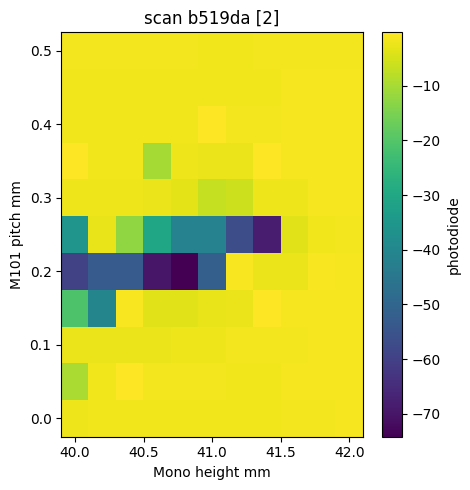

In [187]:
from bluesky.plans import grid_scan
RE(grid_scan(dets,
             m101_pitch_mm, 0.0, 0.5, 11,  # scan motor1 from -1.5 to 1.5 in 3 steps
             mono_height_mm, 40, 42, 11  # scan motor2 from -0.1 to 0.1 in 5 steps
             ))  # scan motor3 from 10 to -10 in 5 steps



Transient Scan ID: 3     Time: 2023-12-19 11:37:31
Persistent Unique Scan ID: '282cb006-117e-47a2-b07c-55eeabf7c195'
New stream: 'primary'
+-----------+------------+---------------+------------+
|   seq_num |       time | M101 pitch mm | photodiode |
+-----------+------------+---------------+------------+
|         1 | 11:37:35.2 |       0.20002 |       -559 |
|         2 | 11:37:37.8 |       0.20498 |       -600 |
|         3 | 11:37:40.4 |       0.20998 |       -599 |
|         4 | 11:37:43.0 |       0.21498 |       -829 |
|         5 | 11:37:45.6 |       0.21998 |       -925 |
|         6 | 11:37:48.2 |       0.22498 |      -1054 |
|         7 | 11:37:50.9 |       0.22998 |      -1125 |
|         8 | 11:37:53.5 |       0.23498 |      -1131 |
|         9 | 11:37:56.1 |       0.23998 |      -1129 |
|        10 | 11:37:58.7 |       0.24498 |      -1109 |
|        11 | 11:38:01.3 |       0.24998 |      -1069 |
|        12 | 11:38:04.0 |       0.25498 |       -997 |
|        13 | 11:38

('282cb006-117e-47a2-b07c-55eeabf7c195',)

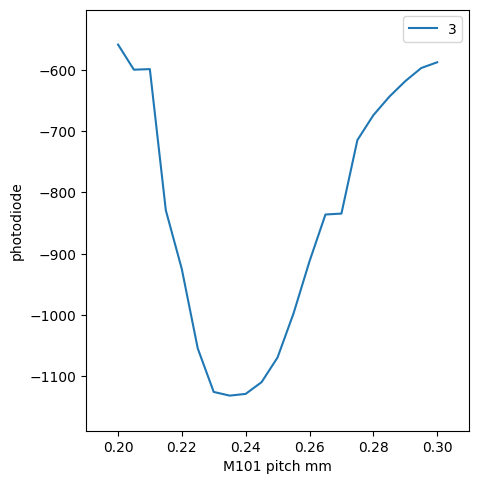

In [132]:
from bluesky.plans import scan
RE(scan(dets, m101_pitch_mm, 0.2, 0.3, 21))

In [191]:
m101_pitch_mm.move(0.25)

MoveStatus(done=True, pos=M101 pitch mm, elapsed=3.5, success=True, settle_time=0.0)

In [128]:
header = db[-1]
header.table()

,time,photodiode,M101 pitch mm,M101 pitch mm_user_setpoint
seq_num,,,,
1,2023-12-19 19:33:58.300783634,-539.6,0.000020,0.00
2,2023-12-19 19:34:01.862716436,-538.8,0.049980,0.05
3,2023-12-19 19:34:05.451926708,-539.5,0.099976,0.10
4,2023-12-19 19:34:09.038368225,-541.7,0.149980,0.15
5,2023-12-19 19:34:12.626232386,-558.9,0.199978,0.20
6,2023-12-19 19:34:16.231402397,-1068.2,0.249982,0.25
7,2023-12-19 19:34:19.787846088,-589.7,0.299974,0.30
8,2023-12-19 19:34:23.359917402,-540.6,0.349980,0.35
9,2023-12-19 19:34:26.898728609,-539.2,0.399978,0.40


In [186]:
# some issues here -- not critical
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
#from bluesky.utils import install_kicker
#install_kicker()

1

In [107]:
table = db[-1].table(fill=True)

In [108]:
mono_angle_deg.move(25)

MoveStatus(done=True, pos=Mono theta deg, elapsed=10.3, success=True, settle_time=0.0)



Transient Scan ID: 9     Time: 2023-12-19 11:06:16
Persistent Unique Scan ID: 'f1d17612-9608-40f6-b211-d42b806290f8'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono theta deg | photodiode |
+-----------+------------+----------------+------------+
|         1 | 11:06:16.4 |        25.0000 |       -542 |
|         2 | 11:06:16.6 |        25.0410 |       -542 |
|         3 | 11:06:16.9 |        25.0820 |       -542 |
|         4 | 11:06:17.1 |        25.1230 |       -542 |
|         5 | 11:06:17.4 |        25.1630 |       -542 |
|         6 | 11:06:17.7 |        25.2040 |       -542 |
|         7 | 11:06:18.0 |        25.2450 |       -542 |
|         8 | 11:06:18.2 |        25.2860 |       -542 |
|         9 | 11:06:18.5 |        25.3270 |       -542 |
|        10 | 11:06:18.8 |        25.3670 |       -542 |
|        11 | 11:06:19.1 |        25.4080 |       -542 |
|        12 | 11:06:19.4 |        25.4490 |       -543 |
|   

('f1d17612-9608-40f6-b211-d42b806290f8',)

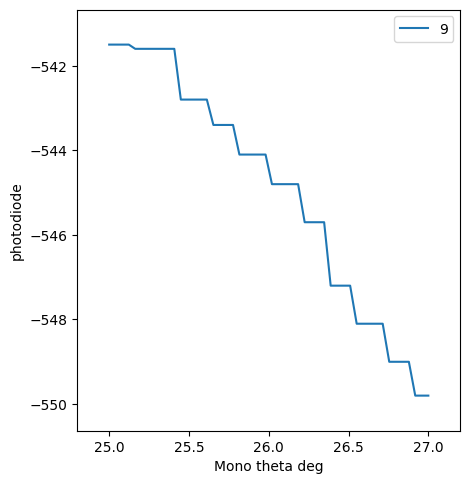

In [109]:
from bluesky.plans import scan
RE(scan(dets, motors, 25, 27, 50))



Transient Scan ID: 11     Time: 2023-12-19 11:29:40
Persistent Unique Scan ID: 'd5cb5b16-f31c-411f-b2a7-eb560f1476a1'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono height mm | photodiode |
+-----------+------------+----------------+------------+
|         1 | 11:29:43.2 |        39.0000 |       -535 |
|         2 | 11:29:43.9 |        39.1000 |       -535 |
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Deferred pause acknowledged. Continuing to checkpoint.
|         3 | 11:29:44.7 |        39.2000 |       -535 |
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


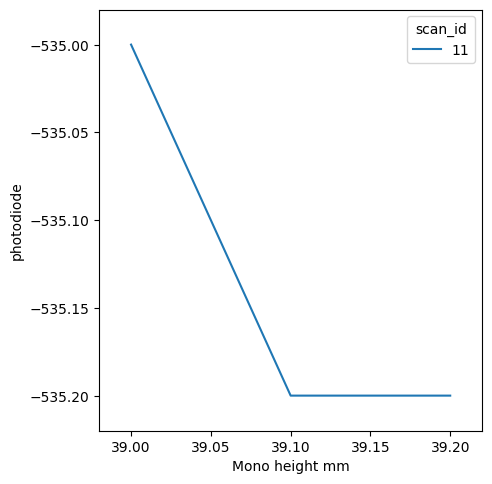

In [111]:
from bluesky.plans import scan
RE(scan(dets, mono_height_mm, 39, 41, 21))

In [68]:
diode_mA.read()

{'photodiode': {'value': -275.63, 'timestamp': 1702948328.513851}}

In [62]:
mono_angle_deg.read()

OrderedDict([('Mono theta deg',
              {'value': 27.0, 'timestamp': 1702947838.469244}),
             ('Mono theta deg_user_setpoint',
              {'value': 27.0, 'timestamp': 1702947842.2226808})])

In [73]:
mono_angle_deg.move(25)

MoveStatus(done=True, pos=Mono theta deg, elapsed=7.2, success=True, settle_time=0.0)



Transient Scan ID: 34     Time: 2023-12-19 10:52:58
Persistent Unique Scan ID: '870d308c-8eb9-44ca-8e3c-7072721f3fae'
New stream: 'primary'
+-----------+------------+----------------+------------+
|   seq_num |       time | Mono theta deg | photodiode |
+-----------+------------+----------------+------------+
|         1 | 10:53:01.9 |        22.0000 |    -124780 |
|         2 | 10:53:02.3 |        22.1000 |    -124770 |
|         3 | 10:53:02.7 |        22.2000 |    -124770 |
|         4 | 10:53:03.0 |        22.3000 |    -124770 |
|         5 | 10:53:03.4 |        22.4000 |    -124760 |
|         6 | 10:53:03.8 |        22.5000 |    -124760 |
|         7 | 10:53:04.1 |        22.6000 |    -124760 |
|         8 | 10:53:04.5 |        22.7000 |    -124760 |
|         9 | 10:53:04.9 |        22.8000 |    -124760 |
|        10 | 10:53:05.2 |        22.9000 |    -124760 |
|        11 | 10:53:05.6 |        23.0000 |    -124790 |
|        12 | 10:53:06.0 |        23.1000 |    -124790 |
|  

RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


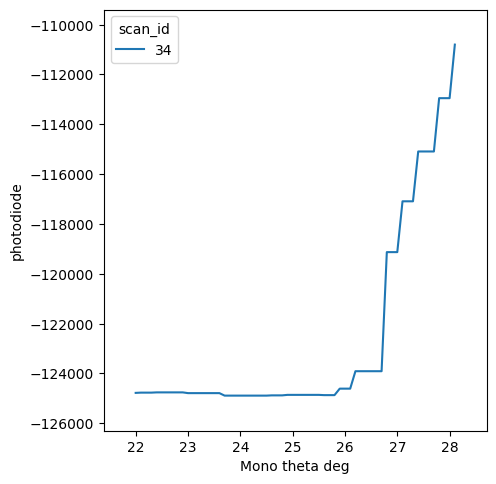

In [74]:
RE(scan(dets, motors, 22, 32, 101))